In [1]:
# Bilbiotecas para auxílio na programação matemática
import math, sys 
import numpy as np
import sympy as sp

from scipy import sparse # Produção das diagonais das matrizes
from scipy.sparse import diags 

# Plotagem 2D e 3D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


from os import path # Suficiente para manipulação de arquivos
    
# Para solução exata
from scipy.special import hermite
from math import factorial

%matplotlib inline
count = 0

# Para otimização dos sistemas
from scipy import optimize

import random

In [2]:
def somar(A, B):
    C = []
    nLinhasA, nLinhasB = len(A), len(B)
    nColA, nColB = len(A[0]), len(B[0])
    
    for i in range (nLinhasA):
        linha = [0]*nColA
        C.append(linha)
        for j in range(nColA):
            C[i][j] = A[i][j] + B[i][j]

    return C

def sub(A, B):
    C = []
    nLinhasA, nLinhasB = len(A), len(B)
    nColA, nColB = len(A[0]), len(B[0])
    
    for i in range (nLinhasA):
        linha = [0]*nColA
        C.append(linha)
        for j in range(nColA):
            C[i][j] = A[i][j] - B[i][j]

    return C

def dpsidt(t,psi, H):
    A = np.zeros((2,2), dtype=np.complex_)
    A = np.dot(complex(0,1),H)
    #print("A = ",A)
    #print("psi = ",psi)
    return (-1*np.matmul(A,psi))

def rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0):
    
    n = (int)((t-t0))
    S = np.zeros((2,int(t)), dtype=np.complex_)
    r = 0
    
    for i in range(1 + p, n + 1 + p):
        
        S[0][r] = psi0[0][0]
        S[1][r] = psi0[1][0]
        
        k1 = dpsidt(t0, psi0, H)
        k2 = dpsidt(t0 + 0.5 * h, somar(psi0, np.dot((0.5*h), k1)), H)
        k3 = dpsidt(t0 + 0.5 * h, somar(psi0, np.dot((0.5*h), k2)), H)
        k4 = dpsidt(t0 + h, somar(psi0, np.dot(h, k3)), H)
        
        A = somar(np.dot(2,k3), k4)
        B = somar(np.dot(2,k2), k1)
        C = somar(A, B)
 
        psi0 = somar(psi0,np.dot((h / 6.0),(C)))
    
        t0 = t0 + h
        
        r = r + 1
        
    return S

def fo(x, D, H, i, psi0):
    
    H1 = np.zeros((2,2), dtype=np.complex_)
    #H2 = np.zeros((2,2), dtype=np.complex_)
    
    H1 = [[0, x[0]+(x[1]*1j)], [x[0]+(x[1]*1j), 0]]
    #H2 = [[0, x[1]], [x[1], 0]]
    
    M = np.zeros((2,1),dtype=np.complex_)
    N = np.zeros((2,1),dtype=np.complex_)
    O = np.zeros((2,1),dtype=np.complex_)
    P = np.zeros((2,1),dtype=np.complex_)
    
    Result1 = np.zeros((2,1),dtype=np.complex_)
    Result2 = np.zeros((2,1),dtype=np.complex_)
    Result3 = np.zeros((2,1),dtype=np.complex_)
    Result4 = np.zeros((2,1),dtype=np.complex_)
    
    M = psi0
    
    Result2 = rungeKutta(M, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    N = [[Result2[0][1]],[Result2[1][1]]]
    
    H1 = [[0, x[2]+(x[3]*1j)], [x[2]+(x[3]*1j), 0]]
    Result3 = rungeKutta(M, h, somar(H,H1), t = 3, t0 = 0, p = 0)
    O = [[Result3[0][2]],[Result3[1][2]]]
    
    H1 = [[0, x[4]+(x[5]*1j)], [x[4]+(x[5]*1j), 0]]
    Result4 = rungeKutta(M, h, somar(H,H1), t = 4, t0 = 0, p = 0)
    P = [[Result4[0][3]],[Result4[1][3]]]
    
    
    Z = np.zeros((2,1),dtype=np.complex_)
    Y = np.zeros((2,1),dtype=np.complex_)
    W = np.zeros((2,1),dtype=np.complex_)
    X = np.zeros((2,1),dtype=np.complex_)
    
    Z[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100)
    Z[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*i/100)
    
    Y[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+1)/100)
    Y[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+1)/100)
    
    W[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+2)/100)
    W[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+2)/100)
    
    X[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+3)/100)
    X[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+3)/100)

    return (np.linalg.norm(Z-M)**2+np.linalg.norm(Y-N)**2+np.linalg.norm(W-O)**2+np.linalg.norm(X-P)**2)

def foS(x, alpha, d, D, H, i, psi0):
     
    z = []
        
    z.append(x[0] + alpha * d[0])
    z.append(x[1] + alpha * d[1])
    z.append(x[2] + alpha * d[2])
    z.append(x[3] + alpha * d[3])
    z.append(x[4] + alpha * d[4])
    z.append(x[5] + alpha * d[5])

    
    H1 = np.zeros((2,2), dtype=np.complex_)
    #H2 = np.zeros((2,2), dtype=np.complex_)
    
    H1 = [[0, z[0]+(z[1]*1j)], [z[0]+(z[1]*1j), 0]]
    #H2 = [[0, x[1]], [x[1], 0]]
    
    M = np.zeros((2,1),dtype=np.complex_)
    N = np.zeros((2,1),dtype=np.complex_)
    O = np.zeros((2,1),dtype=np.complex_)
    P = np.zeros((2,1),dtype=np.complex_)
    
    Result1 = np.zeros((2,1),dtype=np.complex_)
    Result2 = np.zeros((2,1),dtype=np.complex_)
    Result3 = np.zeros((2,1),dtype=np.complex_)
    Result4 = np.zeros((2,1),dtype=np.complex_)
    
    M = psi0
    
    Result2 = rungeKutta(M, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    N = [[Result2[0][1]],[Result2[1][1]]]
    
    H1 = [[0, z[2]+(z[3]*1j)], [z[2]+(z[3]*1j), 0]]
    Result3 = rungeKutta(M, h, somar(H,H1), t = 3, t0 = 0, p = 0)
    O = [[Result3[0][2]],[Result3[1][2]]]
    
    H1 = [[0, z[4]+(z[5]*1j)], [z[4]+(z[5]*1j), 0]]
    Result4 = rungeKutta(M, h, somar(H,H1), t = 4, t0 = 0, p = 0)
    P = [[Result4[0][3]],[Result4[1][3]]]
    
    
    Z = np.zeros((2,1),dtype=np.complex_)
    Y = np.zeros((2,1),dtype=np.complex_)
    W = np.zeros((2,1),dtype=np.complex_)
    X = np.zeros((2,1),dtype=np.complex_)
    
    Z[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100)
    Z[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*i/100)
    
    Y[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+1)/100)
    Y[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+1)/100)
    
    W[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+2)/100)
    W[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+2)/100)
    
    X[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+3)/100)
    X[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+3)/100)

    return (np.linalg.norm(Z-M)**2+np.linalg.norm(Y-N)**2+np.linalg.norm(W-O)**2+np.linalg.norm(X-P)**2)

In [3]:
def SecaoAurea(d, x, D, H, i, psi0):
    eps = 0.00000001
    a = 0
    b = 1
    xa = b - 0.618*(b-a)
    xb = a + 0.618*(b-a)
    fxa = foS(x, xa, d, D, H, i, psi0)
    fxb = foS(x, xb, d, D, H, i, psi0)
    
    while(b - a > eps):
        if(fxa < fxb):
            b = xb
            xb = xa
            xa = b - 0.618*(b - a)
            fxb = fxa
            fxa = foS(x, xa, d, D, H, i, psi0)
        else:
            a = xa
            xa = xb
            xb = a + 0.618*(b - a)
            fxa = fxb
            fxb = foS(x, xb, d, D, H, i, psi0)
            
    xp = (a+b)/2
    return xp

#Avaliação do gradiente
def gradiente(x, D, H, i, psi0):
    h = 0.0000001
    grad = []
    for i in range(len(x)):
        xh = x.copy()
        xh[i] = xh[i] + h
        dx = (fo(xh, D, H, i, psi0)-fo(x, D, H, i, psi0))/h
        grad.append(dx)
    return grad

In [4]:
def MetodoGrad(x, D, H, i, psi0):
    
    eps = 0.0000000001
    errox = eps + 1
    xant = x.copy()
    
    k = 0
    kmax = 100
    normagrad = eps + 1
    
    CP = ''
    
    while(CP == ''):
        d = -1*np.array(gradiente(x, D, H, i, psi0))
        alpha = SecaoAurea(d, x, D, H, i, psi0)
        x[0] = x[0] + alpha * d[0]
        x[1] = x[1] + alpha * d[1]

        x[2] = x[2] + alpha * d[2]
        x[3] = x[3] + alpha * d[3]

        x[4] = x[4] + alpha * d[4]
        x[5] = x[5] + alpha * d[5]
        
        errox = np.linalg.norm(np.array(xant) - np.array(x))
        xant = x.copy()
        if(errox <= eps):
            CP = CP + 'Erro x'
        normagrad = np.linalg.norm(d)
        if(normagrad <= eps):
            CP = CP + 'Norma Gradiente'
        if(k >= kmax):
            CP = 'Numero de iteracoes'
            
        k += 1
        
    xOtimo = x
    return xOtimo

In [5]:
x = []
x.append(random.uniform(-5., 5.))
x.append(random.uniform(-5., 5.))
x.append(x[0])
x.append(x[1])
x.append(x[0])
x.append(x[1])

i = 0

psi0 = [[complex(1.0,0.0)],[complex(0.0,0.0)]]
h = 0.01

E = np.zeros((2,2))
I = np.zeros((2,2))
R = np.zeros((2,2), dtype=np.complex_)
H = E.astype(complex)

A = (1/2*np.pi)
B = (3/2*np.pi)

I = [[1, 0], [0, 1]]
H = [[A, 0], [0, B]]
R = H

Resp = np.zeros((2,1000), dtype=np.complex_)

D = np.zeros((2,1), dtype=np.complex_)
D = [[complex(1/np.sqrt(2),0)],[complex(1/np.sqrt(2),0)]]

while i < 1000:
    
    print("iteracao: ", i+1)
    
    Resp[0][i] = psi0[0][0]
    Resp[1][i] = psi0[1][0]
    
    resultado = MetodoGrad(x, D, H, i, psi0)
    
    x = []
    u = np.zeros((2,2), dtype=np.complex_)
    x.append(resultado[0])
    x.append(resultado[0])
    x.append(x[0])
    x.append(x[1])
    x.append(x[0])
    x.append(x[1])
    
    u = [[0, resultado[0]],[resultado[0], 0]]
        
    i = i + 1
    H = somar(H, u)
    
    psi_t = np.zeros((2,2), dtype=np.complex_)
    
    psi_t = rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0)
    
    psi0[0][0] = psi_t[0][1]
    psi0[1][0] = psi_t[1][1]
    
    H = [[A, 0], [0, B]]

iteracao:  1
iteracao:  2
iteracao:  3
iteracao:  4
iteracao:  5
iteracao:  6
iteracao:  7
iteracao:  8
iteracao:  9
iteracao:  10
iteracao:  11
iteracao:  12
iteracao:  13
iteracao:  14
iteracao:  15
iteracao:  16
iteracao:  17
iteracao:  18
iteracao:  19
iteracao:  20
iteracao:  21
iteracao:  22
iteracao:  23
iteracao:  24
iteracao:  25
iteracao:  26
iteracao:  27
iteracao:  28
iteracao:  29
iteracao:  30
iteracao:  31
iteracao:  32
iteracao:  33
iteracao:  34
iteracao:  35
iteracao:  36
iteracao:  37
iteracao:  38
iteracao:  39
iteracao:  40
iteracao:  41
iteracao:  42
iteracao:  43
iteracao:  44
iteracao:  45
iteracao:  46
iteracao:  47
iteracao:  48
iteracao:  49
iteracao:  50
iteracao:  51
iteracao:  52
iteracao:  53
iteracao:  54
iteracao:  55
iteracao:  56
iteracao:  57
iteracao:  58
iteracao:  59
iteracao:  60
iteracao:  61
iteracao:  62
iteracao:  63
iteracao:  64
iteracao:  65
iteracao:  66
iteracao:  67
iteracao:  68
iteracao:  69
iteracao:  70
iteracao:  71
iteracao:  72
i

iteracao:  555
iteracao:  556
iteracao:  557
iteracao:  558
iteracao:  559
iteracao:  560
iteracao:  561
iteracao:  562
iteracao:  563
iteracao:  564
iteracao:  565
iteracao:  566
iteracao:  567
iteracao:  568
iteracao:  569
iteracao:  570
iteracao:  571
iteracao:  572
iteracao:  573
iteracao:  574
iteracao:  575
iteracao:  576
iteracao:  577
iteracao:  578
iteracao:  579
iteracao:  580
iteracao:  581
iteracao:  582
iteracao:  583
iteracao:  584
iteracao:  585
iteracao:  586
iteracao:  587
iteracao:  588
iteracao:  589
iteracao:  590
iteracao:  591
iteracao:  592
iteracao:  593
iteracao:  594
iteracao:  595
iteracao:  596
iteracao:  597
iteracao:  598
iteracao:  599
iteracao:  600
iteracao:  601
iteracao:  602
iteracao:  603
iteracao:  604
iteracao:  605
iteracao:  606
iteracao:  607
iteracao:  608
iteracao:  609
iteracao:  610
iteracao:  611
iteracao:  612
iteracao:  613
iteracao:  614
iteracao:  615
iteracao:  616
iteracao:  617
iteracao:  618
iteracao:  619
iteracao:  620
iteracao: 

/home/gabriel/miniconda3/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


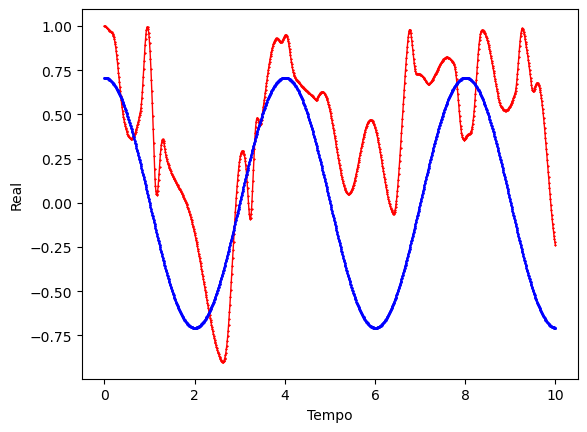

In [6]:
ts = np.linspace(0, 10, 1000)

x = [ele.real for ele in Resp[0]] 
y = [ele.imag for ele in Resp[0]] 

plt.ylabel('Real') 
plt.xlabel('Tempo') 
plt.plot(ts, x, color='r', marker='*', linewidth=1, markersize=1)

p = []

for i in range(0, 1000):
    p.append(1/np.sqrt(2)*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100))

plt.plot(ts, p, color='b', marker='o',  linewidth=1, markersize=1)
plt.savefig('rk_2.png', format='png')
plt.show()

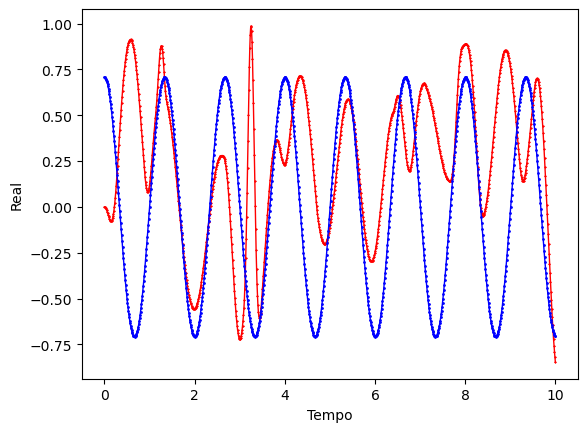

In [7]:
ts = np.linspace(0, 10, 1000)

x = [ele.real for ele in Resp[1]] 
y = [ele.imag for ele in Resp[1]] 

plt.ylabel('Real') 
plt.xlabel('Tempo') 
plt.plot(ts, x, color='r', marker='*', linewidth=1, markersize=1)

p = []

for i in range(0, 1000):
    p.append(1/np.sqrt(2)*np.exp(-3*complex(0,1)*(1/2*np.pi)*i/100))

plt.plot(ts, p, color='b', marker='o',  linewidth=1, markersize=1)
plt.savefig('rk_3.png', format='png')
plt.show()